In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
nose_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/openCV/snapchat/Train/third-party/Nose18x15.xml")
eyes_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/openCV/snapchat/Train/third-party/frontalEyes35x16.xml")

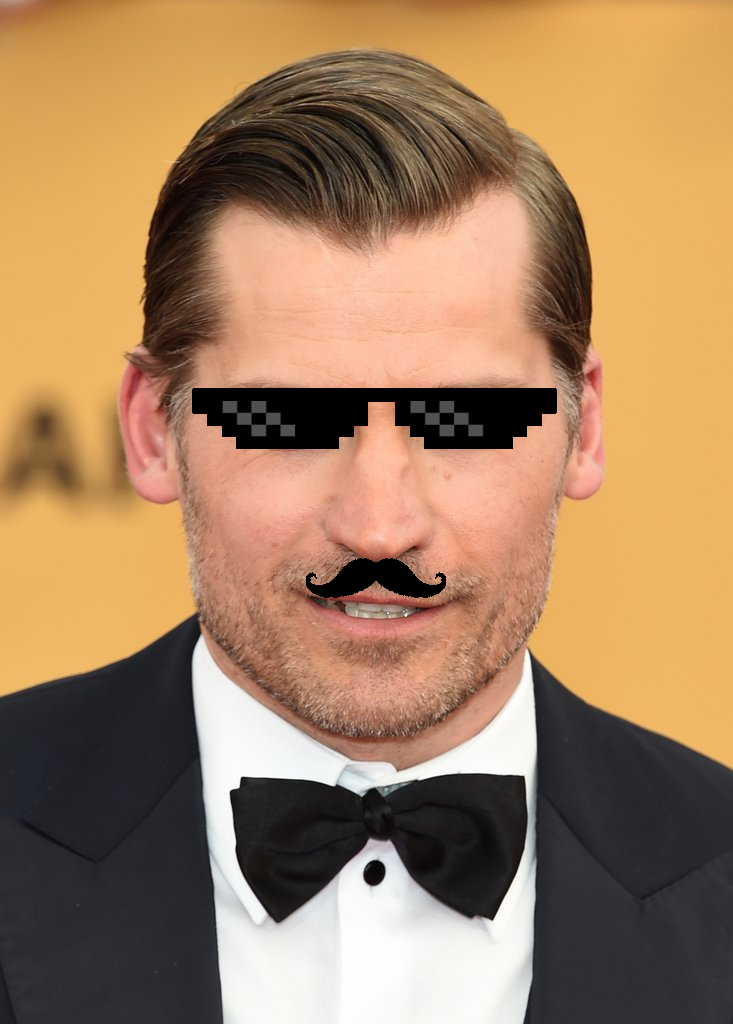

In [4]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/openCV/snapchat/Train/Jamie_Before.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
noses = nose_cascade.detectMultiScale(gray_img,1.3,5)
goggles = cv2.imread("/content/drive/MyDrive/Colab Notebooks/openCV/snapchat/Train/glasses.png", cv2.IMREAD_UNCHANGED)
mustache = cv2.imread("/content/drive/MyDrive/Colab Notebooks/openCV/snapchat/Train/mustache.png",cv2.IMREAD_UNCHANGED)
# goggles = goggles[:,:,:3]
# for nose in noses:
#   x,y,w,h = nose
#   cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
eyes = eyes_cascade.detectMultiScale(gray_img,1.3,5)
# for eye in eyes:
#   x,y,w,h = eye
#   cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
if len(eyes)>0:
  x,y,w,h = eyes[0]
  goggles = cv2.resize(goggles,(w,h))
  if goggles.shape[2] == 4:
    b,g,r,a = cv2.split(goggles)
    overlay_color = cv2.merge((b,g,r))
    mask = a>0
    for c in range(3):
      img[y:y+h,x:x+w,c][mask] = overlay_color[:,:,c][mask]

if len(noses) > 0:
    x, y, w, h = noses[0]

    new_w = int(1.1 * w)  # Only 10% wider
    mustache_aspect_ratio = mustache.shape[0] / mustache.shape[1]
    new_h = int(new_w * mustache_aspect_ratio)

    mustache_resized = cv2.resize(mustache, (new_w, new_h))

    x_offset = x - int((new_w - w) / 2)
    y_offset = y +  57  # Just 10 pixels below the nose

    if mustache_resized.shape[2] == 4:
        b, g, r, a = cv2.split(mustache_resized)
        overlay_color = cv2.merge((b, g, r))
        mask = a > 0

        for c in range(3):
            img[y_offset:y_offset + new_h, x_offset:x_offset + new_w, c][mask] = overlay_color[:, :, c][mask]

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
